This notebook contains the methodology to perform separation of protein interactor datasets in specific, aspecific and undecided fractions, as described by Sala et al.
(https://doi.org/10.1021/acs.jproteome.7b00034)

In [ ]:
import pandas as pd

lmcd1_fl = pd.read_excel("G:/My Drive/Uni/Thesis/Data/Testin_for_TVB/LMCD1 + TesCR/Stefano_EXT983_LMCD1_FL.xlsx", sheet_name = 'proteins') #Replace with your file path

**1. Distribution of the L/H (log2) ratios of the experimentaly identified proteins.**

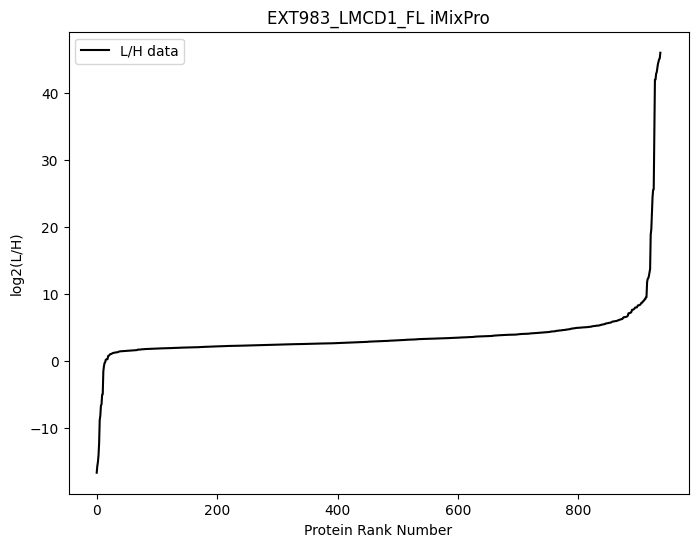

In [3]:
import seaborn as sns
import matplotlib.pyplot as plt

# Assuming lmcd1_fl is your DataFrame and contains the L/H data
LH_data = lmcd1_fl['Median(log2(q.ratio))']  # Use your column for L/H data

# Creating the KDE plot for the full dataset
overview_plot = plt.figure(figsize=(8, 6))

# Plotting the KDE line
sns.lineplot(LH_data, color='black', label='L/H data')

# Titles and labels
plt.title('EXT983_LMCD1_FL iMixPro')
plt.xlabel('Protein Rank Number')
plt.ylabel('log2(L/H)')
# Display the plot
plt.show()

*Take away:*
- The distribution of the log2 ratios of L/H follows the same sigmoid curve shape as the TES data of Sala et al., which was acquired using the same methodology.
- However, it seems the outer datapoints for LMCD1 contain more extreme values than the TES dataset, possibly pointing towards outliers.

Given the above information, we proceed with the same method as used by Sala et al. for our TES data.


**2. Model data.**

The LMCD1 dataset contains about as many proteins as the TES dataset (935). Therefore, it is sensible to use the same boundaries to extrapolate our model data: 150 data points around the median.

In [ ]:
# Step 1: Sort the DataFrame based on the 'Median(log2(q.ratio))' column
sorted_df = lmcd1_fl.sort_values(by='Median(log2(q.ratio))').reset_index(drop=True)

# Step 2: Find the index of the protein with the median log2(L/H) value
median_protein_idx = sorted_df['Median(log2(q.ratio))'].median()
median_idx = (sorted_df['Median(log2(q.ratio))'] - median_protein_idx).abs().idxmin()

# Step 3: Select 75 proteins above and 75 proteins below the median (151 proteins total)
start_idx = max(0, median_idx - 75)
end_idx = min(len(sorted_df), median_idx + 75 + 1)  # +1 to include the median in total count of 151

# Get the subset of proteins
subset_df = sorted_df.iloc[start_idx:end_idx]

# Display the proteins and their log2(L/H) values
subset_df[['First(description)', 'Median(log2(q.ratio))']]

,First(description),Median(log2(q.ratio))
393,RU2B_HUMAN U2 small nuclear ribonucleoprotein B'',2.670597
394,EF2_HUMAN Elongation factor 2,2.675014
395,BYST_HUMAN Bystin,2.679738
396,"EFTU_HUMAN Elongation factor Tu, mitochondrial",2.684341
397,LYAR_HUMAN Cell growth-regulating nucleolar pr...,2.688671
...,...,...
539,NSF1C_HUMAN NSFL1 cofactor p47,3.298199
540,TTC1_HUMAN Tetratricopeptide repeat protein 1,3.300622
541,LAMC1_HUMAN Laminin subunit gamma-1,3.307327
542,EIF3G_HUMAN Eukaryotic translation initiation ...,3.308216


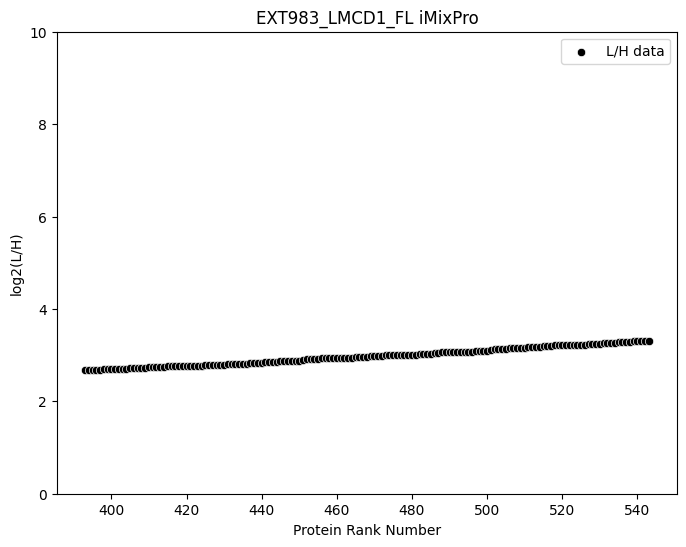

In [5]:
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming subset_df contains the 151 proteins around the median
LH_data = subset_df['Median(log2(q.ratio))']  # log2(L/H) data

# Generating rank numbers for proteins (1 to 151)
protein_rank = range(start_idx, end_idx)

# Creating the scatter plot
plt.figure(figsize=(8, 6))

# Plotting the scatter plot
sns.scatterplot(x=protein_rank, y=LH_data, color='black', label='L/H data')

# Titles and labels
plt.title('EXT983_LMCD1_FL iMixPro')
plt.xlabel('Protein Rank Number')
plt.ylabel('log2(L/H)')
plt.ylim(0, 10)

# Display the plot
plt.show()


Above, we selected the median data point and the 150 data points around it. The graph is the resulting data from which we will extrapolate the model data which we will use to select the specific fraction of our dataset.

We continue by finding the best fitting line through these data points.

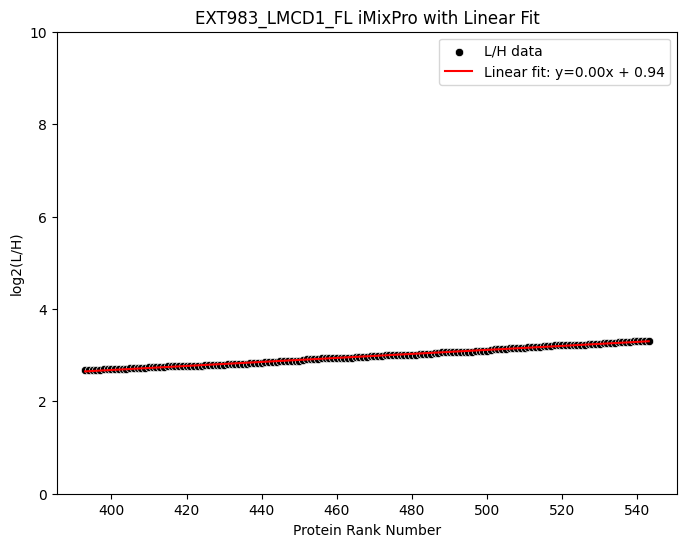

0.004347415292965064 0.9395679122273226


In [ ]:

import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

# Assuming subset_df contains the 151 proteins around the median
LH_data = subset_df['Median(log2(q.ratio))']  # log2(L/H) data

# Generating rank numbers for proteins (1 to 151)
protein_rank = range(start_idx, end_idx)

# Creating the scatter plot
plt.figure(figsize=(8, 6))

# Scatter plot of the data points
sns.scatterplot(x=protein_rank, y=LH_data, color='black', label='L/H data')

# Step 1: Fit a linear regression line using numpy.polyfit (degree=1 for linear)
slope, intercept = np.polyfit(protein_rank, LH_data, 1)

# Step 2: Add the linear fit to the plot
linear_plot = plt.plot(protein_rank, slope * np.array(protein_rank) + intercept, color='red', label=f'Linear fit: y={slope:.2f}x + {intercept:.2f}')

# Titles and labels
plt.title('EXT983_LMCD1_FL iMixPro with Linear Fit')
plt.xlabel('Protein Rank Number')
plt.ylabel('log2(L/H)')
plt.ylim(0, 10)

# Show legend and plot
plt.legend()
plt.show()

print(slope, intercept)


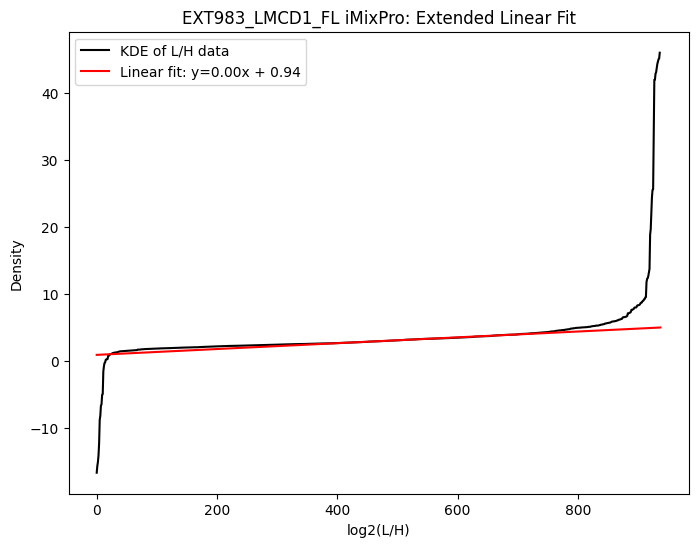

In [ ]:
# Assuming lmcd1_fl is your DataFrame and contains the L/H data
LH_data_full = lmcd1_fl['Median(log2(q.ratio))']  # Full log2(L/H) data for KDE

# Step 1: Create the KDE plot for the full dataset
plt.figure(figsize=(8, 6))
sns.lineplot(LH_data_full, color='black', label='KDE of L/H data')

# Step 2: Use the linear fit from the median + 150 proteins (subset of data)
LH_data_subset = subset_df['Median(log2(q.ratio))']  # log2(L/H) data from the 151 proteins
protein_rank = range(start_idx, end_idx)

# Fit a linear regression line to the subset data
slope, intercept = np.polyfit(protein_rank, LH_data_subset, 1)
x_vals = np.linspace(0, 937, 1000)

# Plot the extended linear fit line
plt.plot(x_vals, slope * x_vals + intercept, color='red', label=f'Linear fit: y={slope:.2f}x + {intercept:.2f}')

# Titles and labels
plt.title('EXT983_LMCD1_FL iMixPro: Extended Linear Fit')
plt.xlabel('log2(L/H)')
plt.ylabel('Density')

# Show the legend and plot
plt.legend()
plt.show()

**3. Define cutoff point for specific fraction as model data - SD.**

First, we generate a theoretical dataset using our model and calculate the SD.

In [ ]:
#Predict for the full range of the experimental dataset
total_points = len(LH_data_full)  # Total number of experimental data points
protein_rank_full = np.arange(1, total_points + 1)  # Protein ranks from 1 to total_points

# Generate predictions for the full range using the fitted model
extrapolated_model_data = slope * protein_rank_full + intercept

# Calculate the standard deviation of the model data
st_dev = np.std(extrapolated_model_data)
print(st_dev)

1.1759256113758279


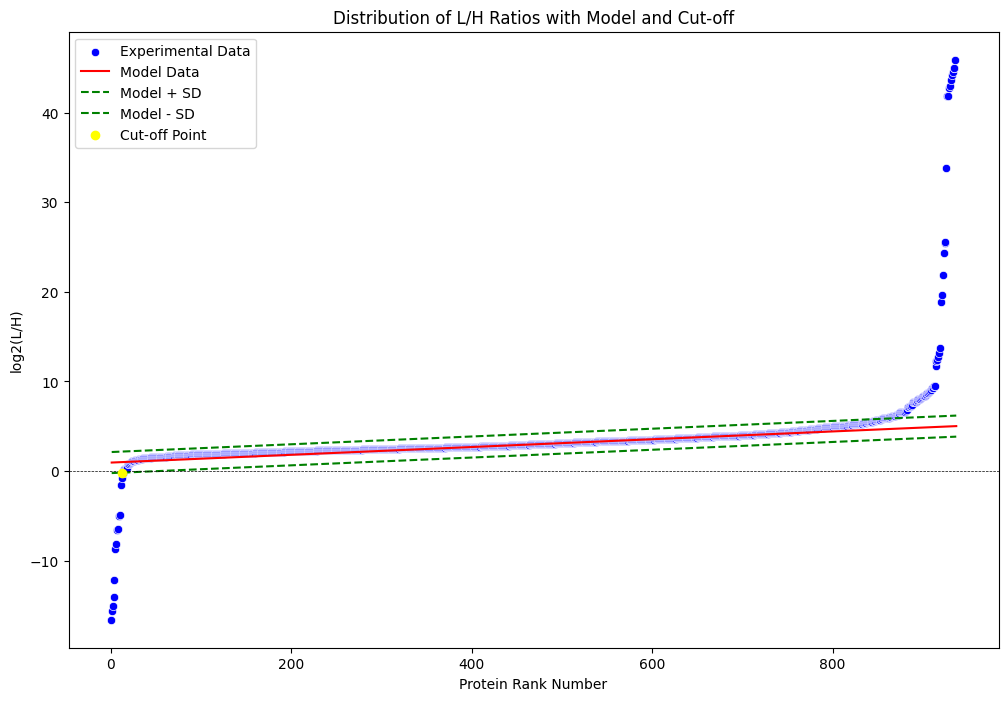

In [9]:
# Assuming lmcd1_fl is your DataFrame
LH_data_full = lmcd1_fl['Median(log2(q.ratio))']

# Step 1: Plot the Actual Data
plt.figure(figsize=(12, 8))
sns.scatterplot(x=range(len(LH_data_full)), y=LH_data_full, color='blue', label='Experimental Data')


# Create lines for the model, model + SD, and model - SD
model_line = slope * np.arange(1, total_points + 1) + intercept
upper_sd_line = model_line + st_dev
lower_sd_line = model_line - st_dev

# Step 4: Plot the Model and Standard Deviation Lines
plt.plot(np.arange(1, len(LH_data_full) + 1), model_line, color='red', label='Model Data')
plt.plot(np.arange(1, len(LH_data_full) + 1), upper_sd_line, color='green', linestyle='--', label='Model + SD')
plt.plot(np.arange(1, len(LH_data_full) + 1), lower_sd_line, color='green', linestyle='--', label='Model - SD')

# Step 5: Determine and Annotate Cut-Off
# Find intersection point with your experimental data (example logic)
cut_off_index = np.where(np.isclose(lower_sd_line, LH_data_full, atol=1))[0]
if cut_off_index.size > 0:
    cut_off_x = cut_off_index[0]
    cut_off_y = lower_sd_line[cut_off_x]
    plt.scatter(cut_off_x, cut_off_y, color='yellow', zorder=5, label='Cut-off Point')

# Titles and labels
plt.title('Distribution of L/H Ratios with Model and Cut-off')
plt.xlabel('Protein Rank Number')
plt.ylabel('log2(L/H)')
plt.axhline(0, color='black', lw=0.5, ls='--')  # Horizontal line at y=0
plt.legend()
plt.show()


In [10]:
# Assuming cut_off_y is your determined cut-off value
# Replace this with your actual cut-off value if it's defined differently
cut_off_value = cut_off_y  

# Step 1: Create a subset of the DataFrame
subset_below_cutoff = lmcd1_fl[lmcd1_fl['Median(log2(q.ratio))'] < cut_off_value]

# Step 2: Display or analyze the subset
print(subset_below_cutoff)

# Optionally, you can also store the size of the subset or perform further analysis
subset_size = len(subset_below_cutoff)
print(f"Number of proteins with L/H ratio below the cut-off: {subset_size}")


   accession                                 First(description)  \
0     Q9H4F8  SMOC1_HUMAN SPARC-related modular calcium-bind...   
1     Q14980  NUMA1_HUMAN Nuclear mitotic apparatus protein ...   
2     Q9Y5B9             SP16H_HUMAN FACT complex subunit SPT16   
3     Q9P2E9             RRBP1_HUMAN Ribosome-binding protein 1   
4     O43493  TGON2_HUMAN Trans-Golgi network integral membr...   
5     Q13247  SRSF6_HUMAN Serine/arginine-rich splicing fact...   
6     P23284   PPIB_HUMAN Peptidyl-prolyl cis-trans isomerase B   
7     P61201      CSN2_HUMAN COP9 signalosome complex subunit 2   
8     P11169  GTR3_HUMAN Solute carrier family 2, facilitate...   
9     Q9Y383  LC7L2_HUMAN Putative RNA-binding protein Luc7-...   
10    O75616              ERAL1_HUMAN GTPase Era, mitochondrial   
11    Q9ULV4                             COR1C_HUMAN Coronin-1C   
12    P28074          PSB5_HUMAN Proteasome subunit beta type-5   
13    Q02218  ODO1_HUMAN 2-oxoglutarate dehydrogenase, mitoc..